# Задание по анализу данных для рекламного аналитика

# КЕЙС

## Рекламодатель КОЛОКОЛЬЧИК отмечает значительный рост CPA по своим рекламным кампаниям в последние 4 месяца (с июля по октябрь 2023). Необходимо проанализировать его размещение по ряду показателей (CPA, CTR, CPC, CR) с целью:

### 1) Выяснить причины роста CPA в июле-октябре 2023
### 2) Дать рекомендации по снижению и стабилизации CPA до целевого значения (600 руб)
### 3) Предложить стратегию масштабирования рекламных кампаний

In [1]:
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

In [2]:
FILE_PATH = r'D:\PROJECTS\PROJECT_20250210_TEST_TASK_Advertising_Analyst_Intern_2025\data.xlsx'

In [3]:
with open(FILE_PATH, 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

In [4]:
print(f"Detected encoding (кодировка): {encoding}") # encoding = 'Windows-1254'

Detected encoding (кодировка): None


In [5]:
# data = pd.read_excel(FILE_PATH, encoding='my-encoding-here')
data = pd.read_excel(FILE_PATH)

In [6]:
# Загрузка данных из файла Excel
data = pd.read_excel(FILE_PATH)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33093 entries, 0 to 33092
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   BannerType     33093 non-null  object        
 1   CampaignType   33093 non-null  object        
 2   Category       33093 non-null  object        
 3   Client         33093 non-null  object        
 4   Date           33093 non-null  datetime64[ns]
 5   Device         33093 non-null  object        
 6   Place          33093 non-null  object        
 7   QueryType      33093 non-null  object        
 8   TargetingType  33093 non-null  object        
 9   Clicks         33093 non-null  int64         
 10  Cost           33093 non-null  float64       
 11  Conversions    33093 non-null  int64         
 12  Shows          33093 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 3.3+ MB
None


#### Пропущенных значений нет

In [8]:
# Удаление дубликатов на основе столбцов 'name' и 'email'
# df_unique = df.drop_duplicates(subset=['name', 'email'])
data = data.drop_duplicates()

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17549 entries, 0 to 33092
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   BannerType     17549 non-null  object        
 1   CampaignType   17549 non-null  object        
 2   Category       17549 non-null  object        
 3   Client         17549 non-null  object        
 4   Date           17549 non-null  datetime64[ns]
 5   Device         17549 non-null  object        
 6   Place          17549 non-null  object        
 7   QueryType      17549 non-null  object        
 8   TargetingType  17549 non-null  object        
 9   Clicks         17549 non-null  int64         
 10  Cost           17549 non-null  float64       
 11  Conversions    17549 non-null  int64         
 12  Shows          17549 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 1.9+ MB
None


#### Удалены дубликаты

In [10]:
client_data = data.copy()

### Расчет ключевых показателей (CPA, CTR, CPC, CR)

In [11]:
client_data = client_data.copy()

In [12]:
# Расчет CPA (Cost Per Action)
client_data.loc[:, 'CPA'] = client_data['Cost'] / client_data['Conversions'].replace(0, np.nan)

In [13]:
# Расчет CTR (Click-Through Rate)
client_data.loc[:, 'CTR'] = client_data['Clicks'] / client_data['Shows'].replace(0, np.nan) * 100

In [14]:
# Расчет CPC (Cost Per Click)
client_data.loc[:, 'CPC'] = client_data['Cost'] / client_data['Clicks'].replace(0, np.nan)

In [15]:
# Расчет CR (Conversion Rate)
client_data.loc[:, 'CR'] = client_data['Conversions'] / client_data['Clicks'].replace(0, np.nan) * 100

In [16]:
# Просмотр данных с новыми расчетными полями с заменой значений inf на NaN
client_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
# Сортировка данных по столбцу 'Date' и переиндексация
client_data_sorted = client_data[['Date', 'CPA', 'CTR', 'CPC', 'CR']].sort_values(by='Date').reset_index(drop=True)

In [18]:
# Печать отсортированной и переиндексированной таблицы
print('\nСтатистика показателей за год по всем партнерам Date, CPA, CTR, CPC, CR:\n')
print(client_data_sorted[['Date', 'CPA', 'CTR', 'CPC', 'CR']])


Статистика показателей за год по всем партнерам Date, CPA, CTR, CPC, CR:

            Date         CPA       CTR        CPC     CR
0     2023-01-01         NaN       NaN        NaN    NaN
1     2023-01-01   19.942671  9.090909  19.942671  100.0
2     2023-01-01  168.278600  1.492537  84.139300   50.0
3     2023-01-01         NaN       NaN        NaN    NaN
4     2023-01-01         NaN       NaN        NaN    NaN
...          ...         ...       ...        ...    ...
17544 2023-10-01  222.285933  0.000000        NaN    NaN
17545 2023-10-01  181.732205  0.000000        NaN    NaN
17546 2023-10-01  183.366376  0.000000        NaN    NaN
17547 2023-10-01  238.348153  0.000000        NaN    NaN
17548 2023-10-01    0.000000       NaN        NaN    NaN

[17549 rows x 5 columns]


In [19]:
# Копия датасета для дальнейших исследований
data_df = client_data.copy()

### График динамики CPA по всем заказчикам за весь период

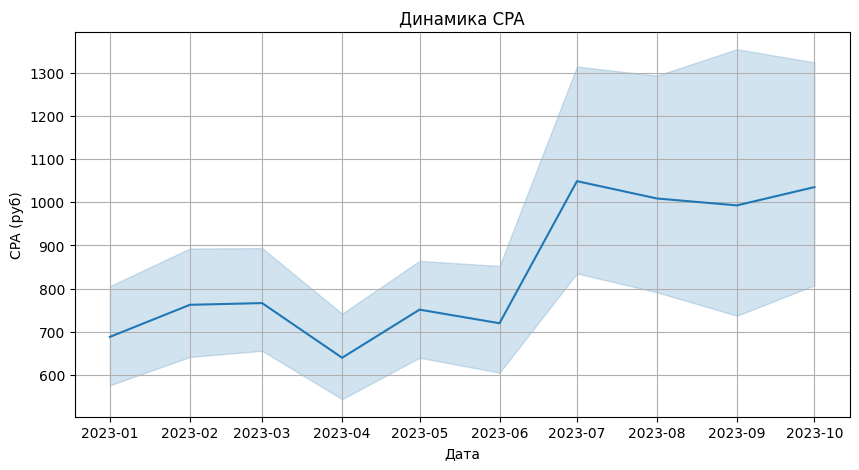

In [20]:
# Заменяем значения inf на NaN
client_data = client_data.replace([np.inf, -np.inf], np.nan)

# Визуализация изменения CPA по времени
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='CPA', data=client_data)
plt.title('Динамика CPA')
plt.xlabel('Дата')
plt.ylabel('CPA (руб)')
plt.grid(True)
plt.show()

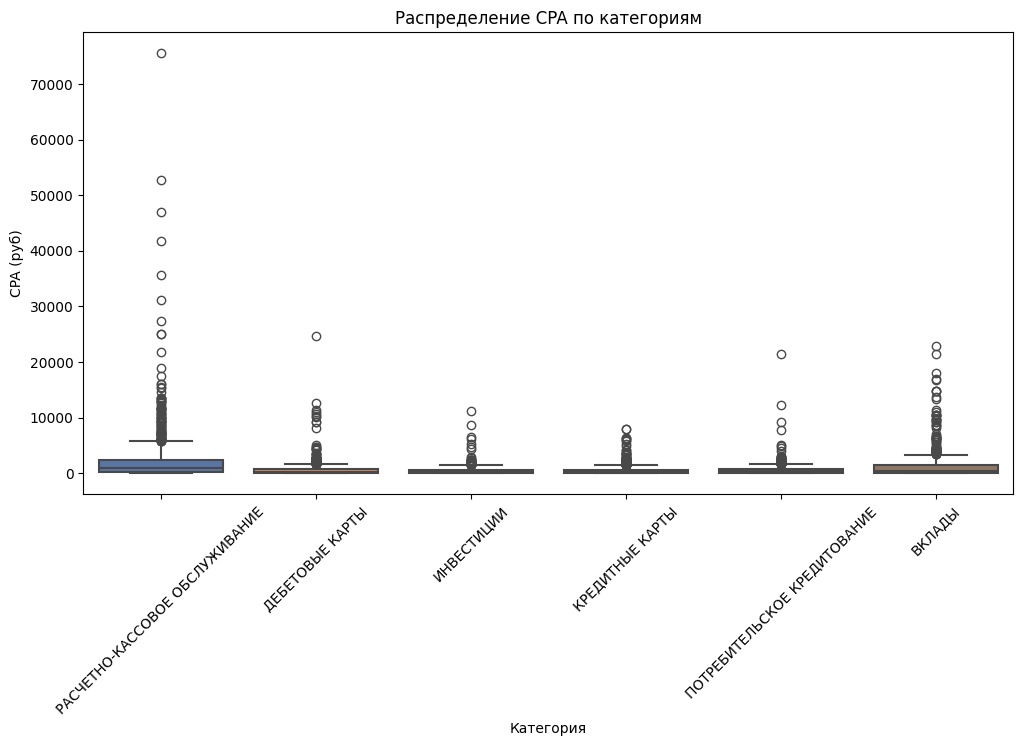

In [21]:
# Анализ CPA по различным категориям
# Цвета для ящиков с усами
colors = sns.color_palette("deep", len(client_data['Category'].unique()))
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='CPA', data=client_data, palette=colors, linewidth=1.5, hue='Category', legend=False)
plt.title('Распределение CPA по категориям')
plt.xlabel('Категория')
plt.ylabel('CPA (руб)')
plt.xticks(rotation=45)
plt.show()

### Наблюдение - все категории рекламных кампаний имеют значительные количества выбросов. 
### Гипотеза - наличие значительного количества выбросов и их значения влияют на возросшее значение CPA.

#### Подсчет количества уникальных заказчиков

In [22]:
num_clients = client_data['Client'].nunique()
print(f"\nКоличество уникальных заказчиков: {num_clients}")
print('Список уникальных заказчиков:')
print(sorted(client_data['Client'].unique()), '\n')
Client_set = sorted(client_data['Client'].unique())


Количество уникальных заказчиков: 8
Список уникальных заказчиков:
['АНЕМОН', 'ВАСИЛЁК', 'ГИАЦИНТ', 'ГЛАДИОЛУС', 'КОЛОКОЛЬЧИК', 'ЛЮТИК', 'ТЮЛЬПАН', 'ЧЕРТОПОЛОХ'] 



### Поставим фильтры на период с июля по октябрь и на клиента КОЛОКОЛЬЧИК

In [23]:
# Фильтр данных по клиенту КОЛОКОЛЬЧИК и периоду
client_data = data[(data['Client'] == 'КОЛОКОЛЬЧИК') & 
                   (data['Date'] >= '2023-07-01') & 
                   (data['Date'] <= '2023-10-31')]

In [24]:
# Расчет ключевых показателей (CPA, CTR, CPC, CR)
client_data = client_data.copy()

# Расчет CPA (Cost Per Action)
client_data.loc[:, 'CPA'] = client_data['Cost'] / client_data['Conversions'].replace(0, np.nan)

# Расчет CTR (Click-Through Rate)
client_data.loc[:, 'CTR'] = client_data['Clicks'] / client_data['Shows'].replace(0, np.nan) * 100

# Расчет CPC (Cost Per Click)
client_data.loc[:, 'CPC'] = client_data['Cost'] / client_data['Clicks'].replace(0, np.nan)

# Расчет CR (Conversion Rate)
client_data.loc[:, 'CR'] = client_data['Conversions'] / client_data['Clicks'].replace(0, np.nan) * 100

In [25]:
# Просмотр данных с новыми расчетными полями с заменой значений inf на NaN
client_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Сортировка данных по столбцу 'Date' и переиндексация
client_data_sorted = client_data[['Date', 'CPA', 'CTR', 'CPC', 'CR']].sort_values(by='Date').reset_index(drop=True)
# Печать отсортированной и переиндексированной таблицы
print('\nDate, CPA, CTR, CPC, CR:\n')
print(client_data_sorted[['Date', 'CPA', 'CTR', 'CPC', 'CR']])


Date, CPA, CTR, CPC, CR:

           Date  CPA       CTR       CPC   CR
0    2023-07-01  NaN  0.440529  50.67983  0.0
1    2023-07-01  NaN       NaN       NaN  NaN
2    2023-07-01  NaN       NaN       NaN  NaN
3    2023-07-01  NaN       NaN       NaN  NaN
4    2023-07-01  NaN       NaN       NaN  NaN
...         ...  ...       ...       ...  ...
1183 2023-10-01  NaN       NaN       NaN  NaN
1184 2023-10-01  NaN       NaN       NaN  NaN
1185 2023-10-01  NaN       NaN       NaN  NaN
1186 2023-10-01  NaN       NaN       NaN  NaN
1187 2023-10-01  0.0       NaN       NaN  NaN

[1188 rows x 5 columns]


### Анализ данных и визуализация

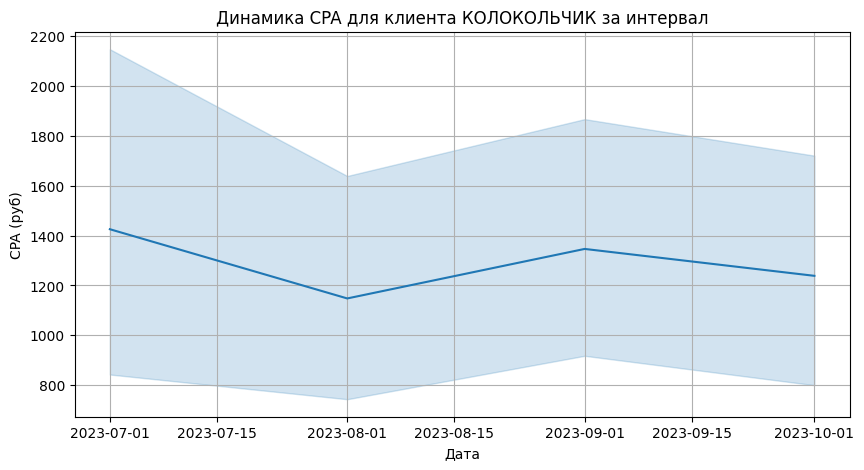

In [26]:
# Визуализация изменения CPA по времени
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='CPA', data=client_data)
plt.title('Динамика CPA для клиента КОЛОКОЛЬЧИК за интервал')
plt.xlabel('Дата')
plt.ylabel('CPA (руб)')
plt.grid(True)
plt.show()

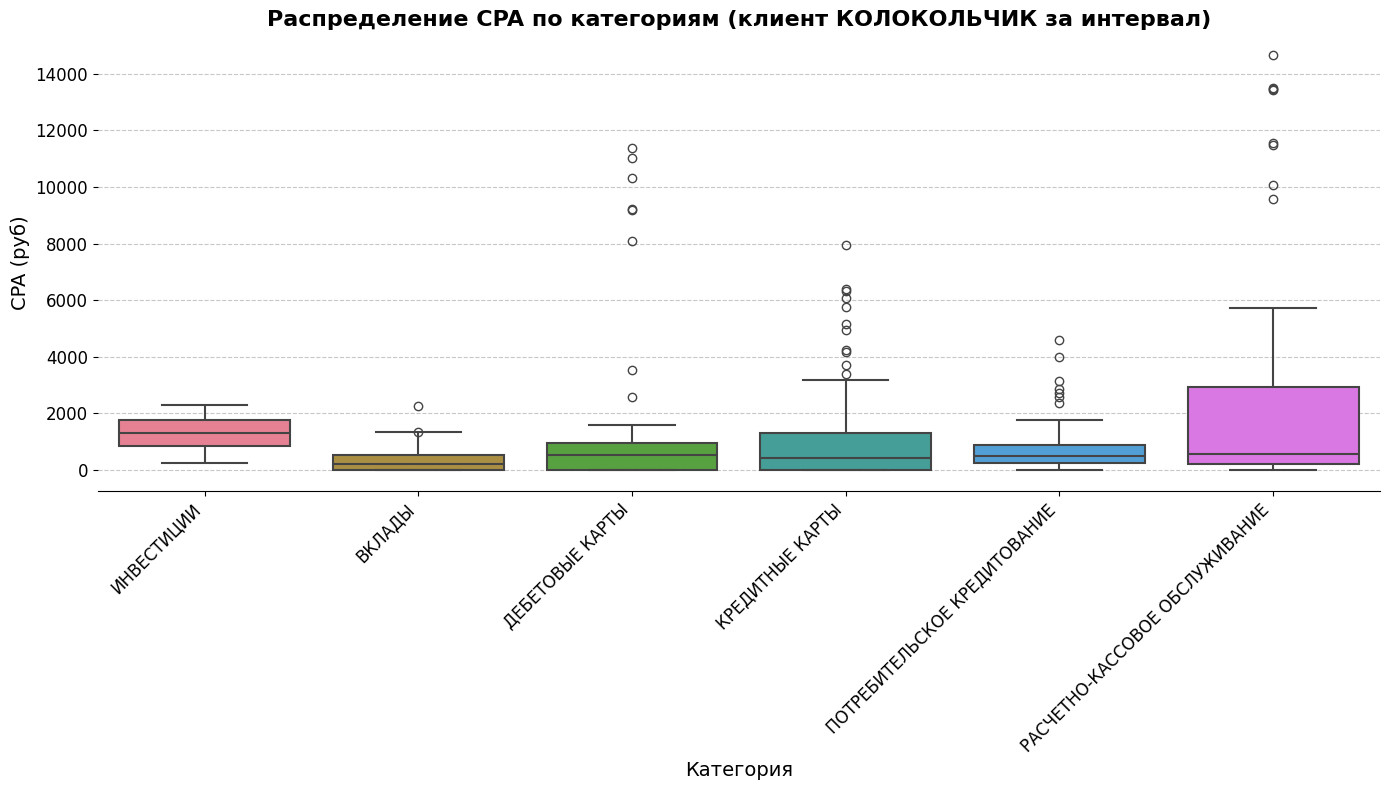

In [27]:
# Цвета для ящиков с усами
colors = sns.color_palette("husl", len(client_data['Category'].unique()))

# Построение ящика с усами с улучшенным стилем
plt.figure(figsize=(14, 8))  # Увеличенный размер графика для лучшей читаемости

sns.boxplot(x='Category', y='CPA', data=client_data, palette=colors, linewidth=1.5, hue='Category', legend=False)

# Настройка заголовка и меток
plt.title('Распределение CPA по категориям (клиент КОЛОКОЛЬЧИК за интервал)', fontsize=16, fontweight='bold')
plt.xlabel('Категория', fontsize=14)
plt.ylabel('CPA (руб)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # ha='right' для лучшего выравнивания
plt.yticks(fontsize=12)

# Добавление сетки для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Улучшение внешнего вида графика
sns.despine(left=True)  # Убираем левую границу

plt.tight_layout()  # Предотвращает обрезание меток
plt.show()

### Динамика конверсии

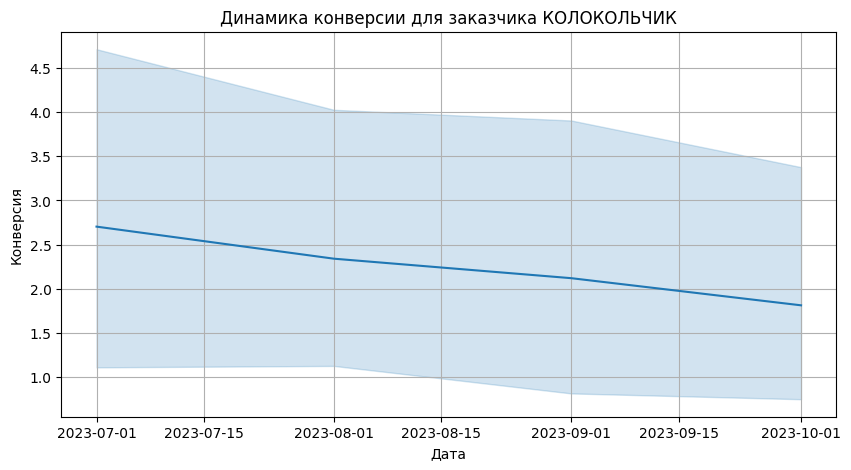

In [28]:
# Визуализация изменения CPA по времени
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Conversions', data=client_data)
plt.title('Динамика конверсии для заказчика КОЛОКОЛЬЧИК')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid(True)
plt.show()

#### Конверсия линейно падает  последние 4 месяца.

In [29]:
data = data_df.copy()

In [30]:
# Создаем новый столбец BoxPlot и заполняем его значениями
data['BoxPlot'] = np.nan

In [31]:
# Группировка данных по 'Client' и 'Category'
grouped = data.groupby(['Client', 'Category'])

### Пометим выбросы

In [32]:
def calculate_stats(group):
    if group['CPA'].empty:
        # Обработка случаев, когда группы могут быть пустыми, тобы избежать `RuntimeWarning`.
        # Использую параметр `include_groups=False` в методе `apply`, чтобы избежать `DeprecationWarning`.
        # Здесь возвращаю пустую группу, но можно придумать свой вариант для возвращаемого значения.
        return np.nan # NaN # group

    cpa_avg = group['CPA'].mean(skipna=True)
    cpa_median = group['CPA'].median(skipna=True)
    cpa_min = group['CPA'].min(skipna=True)
    cpa_max = group['CPA'].max(skipna=True)
    cpa_q25 = group['CPA'].quantile(0.25)
    cpa_q75 = group['CPA'].quantile(0.75)
    cpa_iqr = cpa_q75 - cpa_q25
    cpa_iqr_up = cpa_q75 + 1.5 * cpa_iqr
    cpa_iqr_down = cpa_q25 - 1.5 * cpa_iqr

    # Добавление новых столбцов
    group['CPA_avg'] = cpa_avg
    group['CPA_mediana'] = cpa_median
    group['CPA_min'] = cpa_min
    group['CPA_max'] = cpa_max
    group['CPA_q25'] = cpa_q25
    group['CPA_q75'] = cpa_q75
    group['CPA_iqr'] = cpa_iqr
    group['CPA_iqrUP'] = cpa_iqr_up
    group['CPA_iqrDOWN'] = cpa_iqr_down
    group['BoxPlot'] = group['CPA'].apply(lambda x: 'top ejection' if x >= cpa_iqr_up else '')

    return group

In [33]:
# Применение функции к каждой группе
data = grouped.apply(calculate_stats)

C:\Users\VAIO\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\VAIO\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\VAIO\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\VAIO\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\VAIO\AppData\Local\Temp\ipykernel_6452\132573127.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versio

In [34]:
# Сброс индекса
data = data.reset_index(drop=True)
data_df = data.copy()

In [35]:
# Подсчет количества строк со значением 'top ejection'
top_ejection_count = data[data['BoxPlot'] == 'top ejection'].shape[0]

# Подсчет количества остальных строк
other_count = data[data['BoxPlot'] != 'top ejection'].shape[0]

# Вывод результатов с использованием f-строки
print(f"Количество строк со значением 'top ejection' выбросы: {top_ejection_count}")
print(f"Количество остальных строк: {other_count}")

Количество строк со значением 'top ejection' выбросы: 327
Количество остальных строк: 17222


In [36]:
# Фильтруем данные, исключая строки с 'top ejection' в столбце BoxPlot
filtered_data = data[data['BoxPlot'] != 'top ejection']

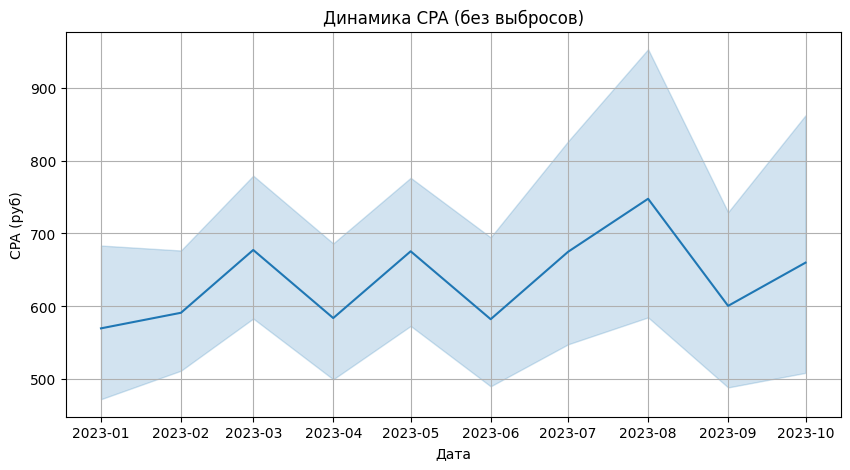

In [37]:
# Визуализация изменения CPA по времени после удаления выбросов
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='CPA', data=filtered_data)
plt.title('Динамика CPA (без выбросов)')
plt.xlabel('Дата')
plt.ylabel('CPA (руб)')
plt.grid(True)
plt.show()

#### Если локализовать выбросы в значениях CPA, то без учёта выбросов целевое значение CPA может быть достигнуто. Наличие выбросов является причиной значительного роста CPA.
Поставим фильтры - период и КОЛОКОЛЬЧИК - и посмотрим изменения.

In [38]:
# Фильтр данных по клиенту КОЛОКОЛЬЧИК и периоду
client_data = filtered_data[(filtered_data['Client'] == 'КОЛОКОЛЬЧИК') & 
                   (filtered_data['Date'] >= '2023-07-01') & 
                   (filtered_data['Date'] <= '2023-10-31')]

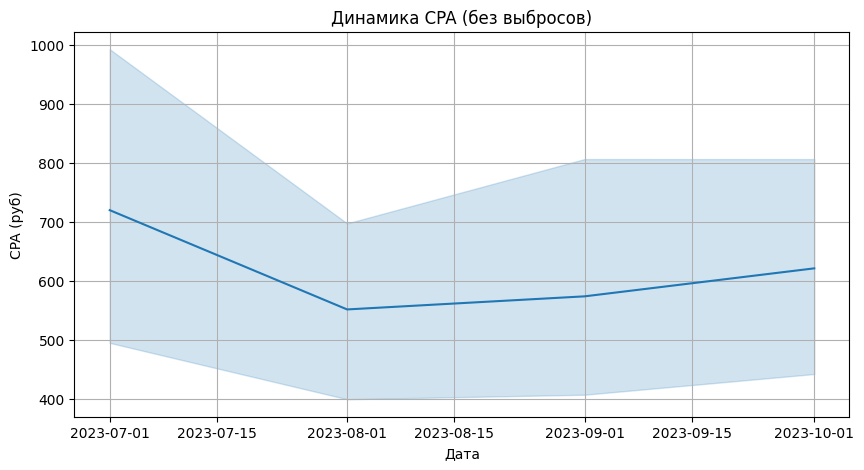

In [39]:
# Визуализация изменения CPA по времени после удаления выбросов, фильтра по дате и КОЛОКОЛЬЧИКА
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='CPA', data=client_data)
plt.title('Динамика CPA (без выбросов)')
plt.xlabel('Дата')
plt.ylabel('CPA (руб)')
plt.grid(True)
plt.show()

### Причины роста CPA в июле-октябре 2023 - наличие выбросов у четырёх категорий. Если локализовать выбросы, то CPA достигнет целевого (600) уровня.

In [40]:
# Фильтрация датасета по условию BoxPlot = 'top ejection'
filtered_data = data[data['BoxPlot'] == 'top ejection']

In [41]:
# Оставляем только нужные столбцы
columns_to_keep = [
    'BannerType',
    'CampaignType',
    'Category',
    'Client',
    'Device',
    'Place',
    'QueryType',
    'TargetingType'
]
filtered_data = filtered_data[columns_to_keep]

In [42]:
# Сортировка данных по указанным столбцам
sorted_data = filtered_data.sort_values(by=['Client', 'Category', 'CampaignType', 'BannerType'])

In [43]:
# Применение операции set() для удаления дубликатов
unique_data = sorted_data.drop_duplicates()

In [44]:
# Переиндексация датасета
unique_data.reset_index(drop=True, inplace=True)

In [45]:
# Вывод результата
print(unique_data)

    BannerType CampaignType                      Category      Client  \
0         text         text                        ВКЛАДЫ      АНЕМОН   
1     image_ad         text               ДЕБЕТОВЫЕ КАРТЫ      АНЕМОН   
2         text         text               ДЕБЕТОВЫЕ КАРТЫ      АНЕМОН   
3         text         text               ДЕБЕТОВЫЕ КАРТЫ      АНЕМОН   
4         text         text               ДЕБЕТОВЫЕ КАРТЫ      АНЕМОН   
..         ...          ...                           ...         ...   
120       text         text                        ВКЛАДЫ  ЧЕРТОПОЛОХ   
121       text         text                        ВКЛАДЫ  ЧЕРТОПОЛОХ   
122       text         text                        ВКЛАДЫ  ЧЕРТОПОЛОХ   
123       text         text               ДЕБЕТОВЫЕ КАРТЫ  ЧЕРТОПОЛОХ   
124       text         text  ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ  ЧЕРТОПОЛОХ   

      Device     Place    QueryType  TargetingType  
0     Mobile    Search        Brand         Phrase  
1     Mobile  Net

In [46]:
filtered_data = unique_data[unique_data['Client'] == 'КОЛОКОЛЬЧИК']
print(filtered_data)

   BannerType CampaignType                        Category       Client  \
61       text         text                          ВКЛАДЫ  КОЛОКОЛЬЧИК   
62       text         text                          ВКЛАДЫ  КОЛОКОЛЬЧИК   
63       text         text                          ВКЛАДЫ  КОЛОКОЛЬЧИК   
64       text         text                 ДЕБЕТОВЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
65       text         text                 ДЕБЕТОВЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
66       text         text                 ДЕБЕТОВЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
67       text         text                 ДЕБЕТОВЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
68       text         text                 ДЕБЕТОВЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
69       text         text                 КРЕДИТНЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
70       text         text                 КРЕДИТНЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
71       text         text                 КРЕДИТНЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
72       text         text                 КРЕДИТНЫЕ КАРТЫ  КОЛОКОЛЬЧИК   
73       text         tex

In [47]:
client_data = data_df.copy()

In [48]:
def calculate_roi(cpa, cpc, ctr, cr):
    if cpc == 0:
        return 0  # Чтобы избежать деления на ноль
    roi_cpa_cpc = (cpa - cpc) / cpc * 100
    roi_ctr_cr = ctr * cr * 100
    return (roi_cpa_cpc + roi_ctr_cr) / 2  # Среднее значение ROI

In [49]:
# Применяем функцию calculate_roi построчно
client_data['ROI'] = client_data.apply(
    lambda row: calculate_roi(row['CPA'], row['CPC'], row['CTR'], row['CR']),
    axis=1
)

In [50]:
# Проверка, что столбец 'ROI' существует и не содержит только NaN значения
if 'ROI' not in client_data.columns:
    raise ValueError("Столбец 'ROI' не найден в DataFrame.")

In [51]:
# Удаление строк с NaN значениями в 'ROI', если они есть
client_data_cleaned = client_data.dropna(subset=['ROI'])

In [52]:
# Проверка, что после удаления NaN есть данные для построения графика
if client_data_cleaned.empty:
    raise ValueError("Все значения в столбце 'ROI' являются NaN. Нечего визуализировать.")

In [53]:
# Client_set содержит уникальные имена клиентов
num_clients = len(Client_set)

In [54]:
# Определяем количество строк и столбцов для подграфиков
# Пасположим графики в виде сетки, где количество столбцов равно 3
cols = 3
rows = math.ceil(num_clients / cols)

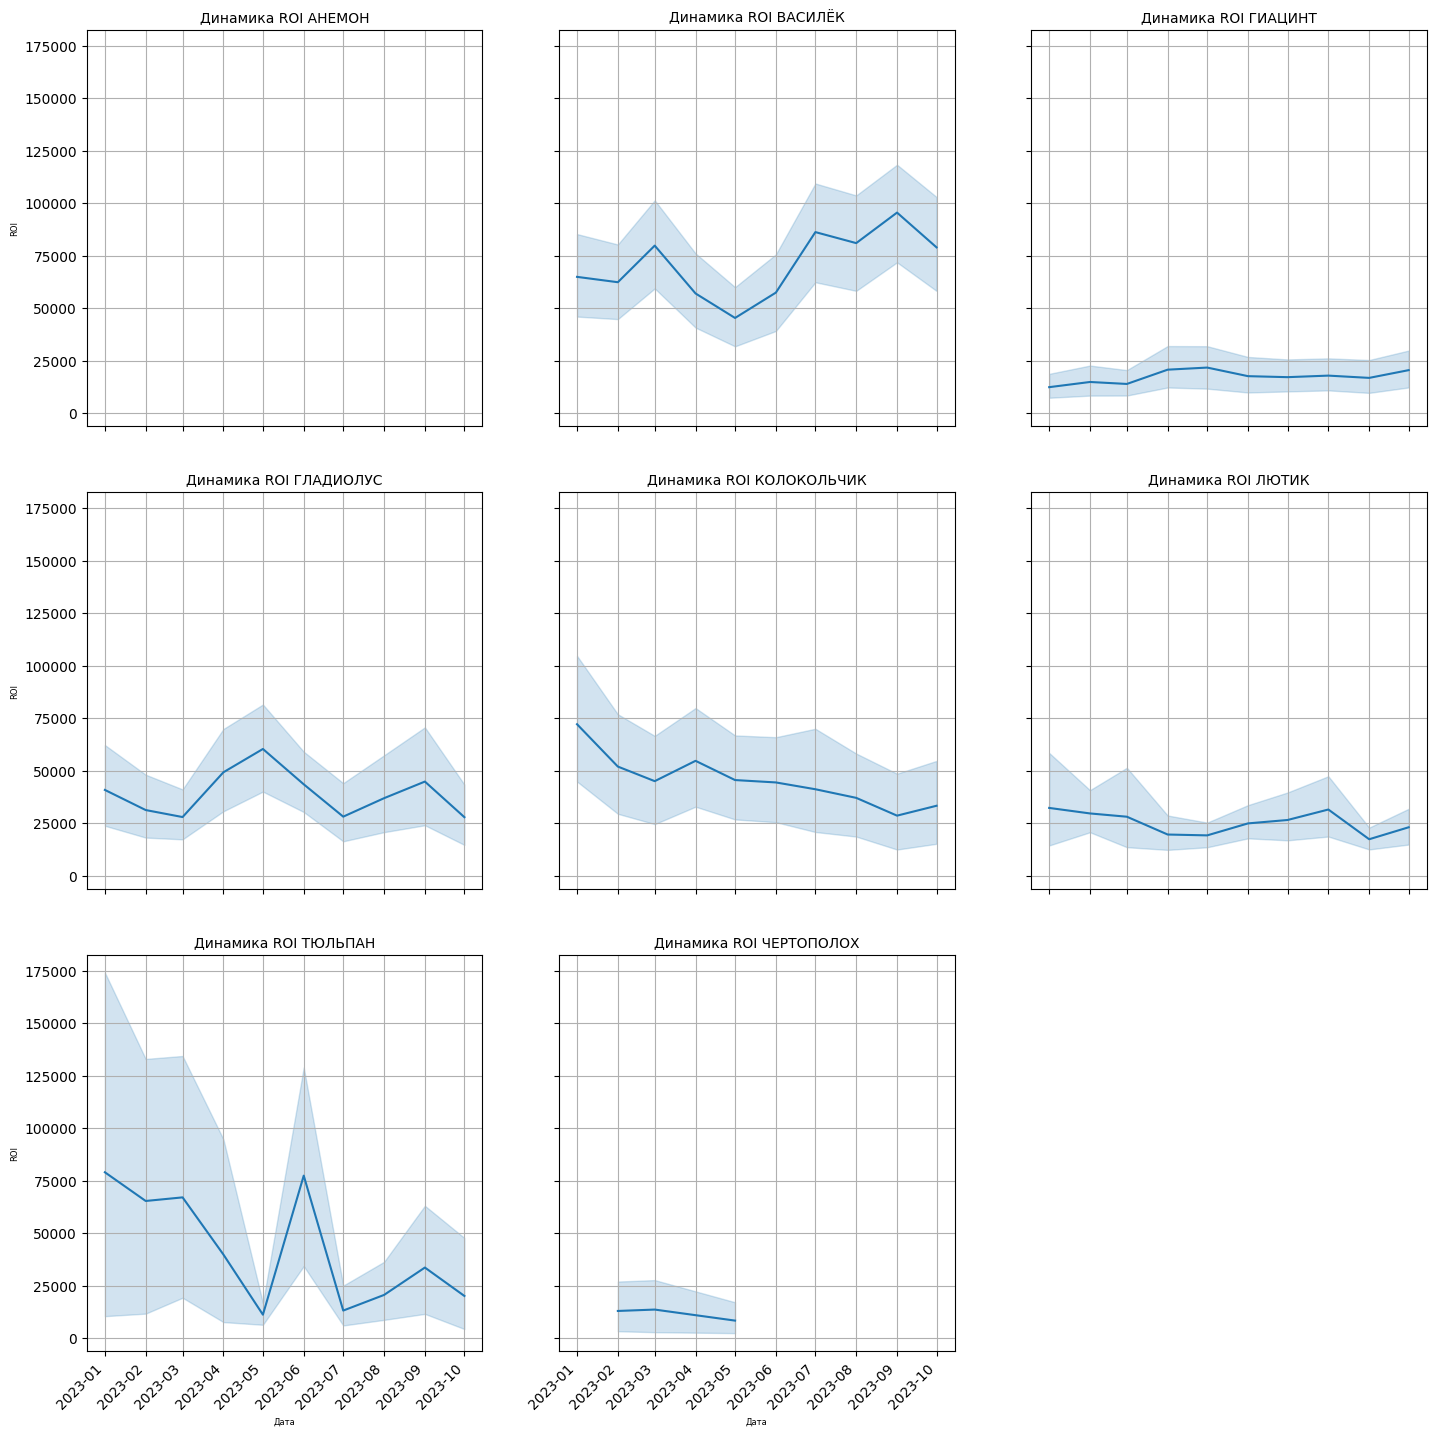

In [55]:
# Создаем фигуру и подграфики
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharex=True, sharey=True)
axes = axes.flatten()

# Построение графиков для каждого клиента
for i, clnt in enumerate(Client_set):
    client_data_tmp = client_data_cleaned[client_data_cleaned['Client'] == clnt]
    
    # Построение графика на соответствующем подграфике
    sns.lineplot(ax=axes[i], x='Date', y='ROI', data=client_data_tmp)
    axes[i].set_title('Динамика ROI ' + clnt, fontsize=10)  # Увеличить размер шрифта заголовка, если необходимо
    axes[i].set_xlabel('Дата', fontsize=6)  # Задаем размер шрифта для оси абсцисс
    axes[i].set_ylabel('ROI', fontsize=6)  # Задаем размер шрифта для оси ординат
    axes[i].grid(True)
    
    # Поворот подписей по оси абсцисс на 45 градусов
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')  # Выравнивание по правому краю
        
# Удаляем пустые подграфики, если их больше, чем нужно
for i in range(num_clients, len(axes)):
    fig.delaxes(axes[i])

# Настройка отступов между подграфиками
plt.tight_layout(pad=3.0)  # Увеличиваем отступы между графиками

plt.show()

### Рекомендации по масштабированию

#### Цель масштабирования — увеличение возврата средств  на инвестиции (ROI) и добиться лучших результатов от рекламной кампании, сохраняя или улучшая эффективность затрат. В этом контексте рекомендации могут быть такими:

####  увеличение конверсии
####  увеличение выручки
####  уменьшение CPA и CPC
####  выполнить бенчмаркинг рекламных кампаний у заказчиков ВАСИЛЕК, ГИАЦИНТ, ТЮЛЬПАН в контексте удержания CPA и ROI (ВАСИЛЁК))
####  в качестве моделей масштабирования рассмотреть рекламную политику у перечисленных клиентов